**An approach of Neural Network to predict Iris Species**

This kernel uses multilayer perceptrons (Neural Network) to predict the species of the Iris dataset.Neural network is a machine learning algorithm which is inspired by a neuron.

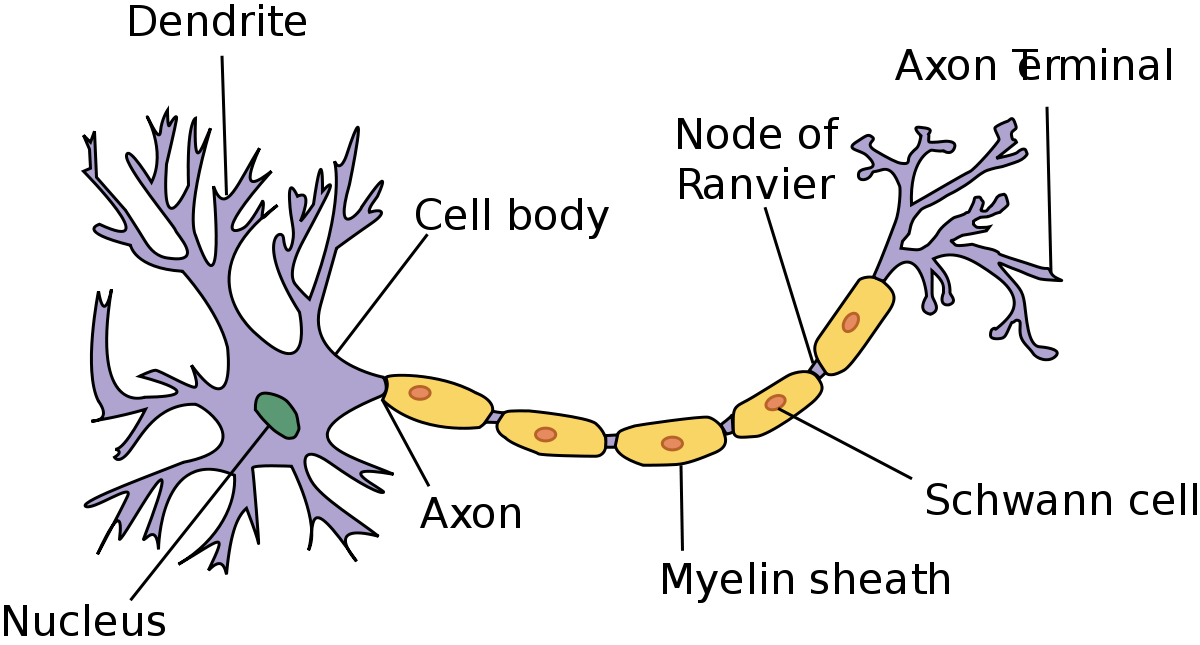

A neuron consists of a dendrite and an axon which are responsible for collecting and sending signals. For our artificial neural network, the concept works similar in which a lot of neurons are connected to each layer with its own corresponding weight and biases.

Although there are currently architecture of neural network, multilayer perceptron is being used as the architecture to prevent overfitting(training accuracy=good but test accuracy=bad)  to the Iris Species due to less feature.

In [1]:
#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library

Using TensorFlow backend.


In [2]:
#Reading data 
data=pd.read_csv("../input/Iris.csv")
print("Describing the data: ",data.describe())
print("Info of the data:",data.info())

Describing the data:                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Sp

In [3]:
print("10 first samples of the dataset:",data.head(10))
print("10 last samples of the dataset:",data.tail(10))

10 first samples of the dataset:    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
10 last samples of the dataset:       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141          

**Visualisation of the dataset**

The coding below shows the visualisation of the dataset in order to understand the data more. It can be seen that every species of the Iris can be segregated into different regions to be predicted.

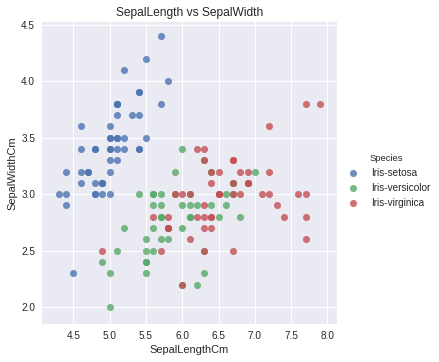

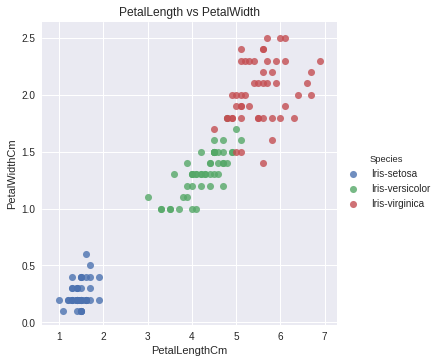

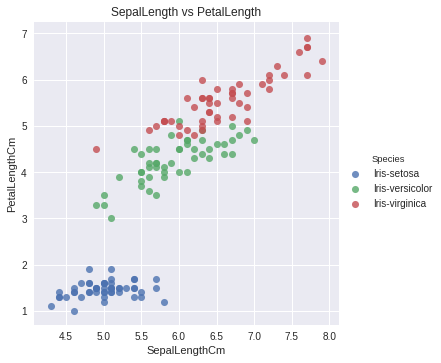

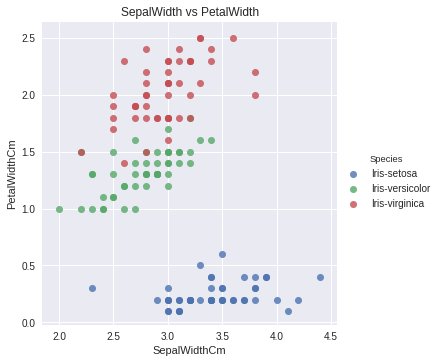

In [4]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('PetalLengthCm', 'PetalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('SepalLengthCm', 'PetalLengthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('SepalWidthCm', 'PetalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

Coding below convert the species into each respective category to be feed into the neural network

In [5]:
print(data["Species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [6]:
data.loc[data["Species"]=="Iris-setosa","Species"]=0
data.loc[data["Species"]=="Iris-versicolor","Species"]=1
data.loc[data["Species"]=="Iris-virginica","Species"]=2
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0


In [7]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
20    21            5.4           3.4            1.7           0.2       0
88    89            5.6           3.0            4.1           1.3       1
54    55            6.5           2.8            4.6           1.5       1
142  143            5.8           2.7            5.1           1.9       2
95    96            5.7           3.0            4.2           1.2       1


Converting data to numpy array in order for processing 

In [8]:
X=data.iloc[:,1:5].values
y=data.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[ 5.4  3.4  1.7  0.2]
 [ 5.6  3.   4.1  1.3]
 [ 6.5  2.8  4.6  1.5]]
Examples of y
 [0 1 1]


**Normalization**

It can be seen from above that the feature of the first dataset has 6cm in Sepal Length, 3.4cm in Sepal Width, 4.5cm in Petal Length and 1.6cm in Petal Width. However, the range of the dataset may be different. Therefore, in order to maintain a good accuracy, the feature of each dataset must be normalized to a range of 0-1 for processing 

In [9]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[ 0.07471338  0.09000348  0.03344928  0.01150299]
 [ 0.07748055  0.07941484  0.08067178  0.07476947]
 [ 0.08993278  0.07412052  0.0905098   0.08627246]]


In [10]:
#Creating train,test and validation data
'''
80% -- train data
20% -- test data
'''
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [11]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

In [12]:
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [13]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              5000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 0s - loss: 1.0903 - acc: 0.5333 - val_loss: 1.0660 - val_acc: 0.7333
Epoch 2/10
120/120 [==============================] - 0s - loss: 1.0398 - acc: 0.6500 - val_loss: 0.9720 - val_acc: 0.7333
Epoch 3/10
120/120 [==============================] - 0s - loss: 0.9271 - acc: 0.6500 - val_loss: 0.7915 - val_acc: 0.7667
Epoch 4/10
120/120 [==============================] - 0s - loss: 0.7246 - acc: 0.6917 - val_loss: 0.5455 - val_acc: 0.8333
Epoch 5/10
120/120 [==============================] - 0s - loss: 0.5310 - acc: 0.7750 - val_loss: 0.3664 - val_acc: 0.9333
Epoch 6/10
120/120 [==============================] - 0s - loss: 0.3646 - acc: 0.9583 - val_loss: 0.2615 - val_acc: 0.9667
Epoch 7/10
120/120 [==============================] - 0s - loss: 0.2782 - acc: 0.9417 - val_loss: 0.1940 - val_acc: 0.9667
Epoch 8/10
120/120 [==============================] - 0s - loss: 0.2106 - acc: 0.9750 - val_lo

In [16]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 100.0


An accuracy of **100%** is achieved in this dataset.It can be asserted that for each epoch, the neural network is trying to learn from its existing feature and predict it by its weights and biases. For each epoch, the weights and biases and changed by subtracting its rate to get a better accuracy each time.


**Further improvement: **

1.Adding batch normalization 

2.Adding dropout layer to prevent overfitting 